In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
import keras
import h5py


In [3]:
PATH = "generi_test.h5"

In [7]:
class Data():
    def __init__(self, mfcc, generi, target) -> None:
        self.mfcc = mfcc
        self.generi = generi
        self.target = target

data: Data = None
with h5py.File(PATH, "r") as d:
    print(d.keys(), d.attrs.keys())
    mfcc = d["mfccs"][::].copy()
    generi = d.attrs["generi"][::].copy()
    target = d.attrs["target"][::].copy()
    data = Data(mfcc=mfcc, generi=generi, target=target)



<KeysViewHDF5 ['mfccs']> <KeysViewHDF5 ['generi', 'target']>


array(['pop', 'metal', 'disco', 'blues', 'reggae', 'classical', 'rock',
       'hiphop', 'country', 'jazz'], dtype=object)

In [24]:
x_train, x_test, y_train, y_test = train_test_split(data.mfcc, data.target, test_size=0.20)

In [38]:
model = keras.Sequential([

    keras.layers.Flatten(input_shape=(data.mfcc.shape[1], data.mfcc.shape[2])),
    keras.layers.Dense(512, activation="relu", kernel_regularizer=keras.regularizers.l2(0.0001)),
    keras.layers.Dropout(0.21),
    keras.layers.Dense(256, activation="relu", kernel_regularizer=keras.regularizers.l2(0.0001)),
    keras.layers.Dropout(0.21),
    keras.layers.Dense(64, activation="relu", kernel_regularizer=keras.regularizers.l2(0.0001)),
    keras.layers.Dropout(0.21),
    keras.layers.Dense(10, activation="softmax")
])

/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [39]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 3367)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │     1,724,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,872,842 (7.14 MB)

 Trainable params: 1,872,842 (7.14 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 3367)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │     1,724,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,872,842 (7.14 MB)

 Trainable params: 1,872,842 (7.14 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
netfit = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=1000, batch_size=32)

Epoch 1/1000


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - accuracy: 0.0992 - loss: 358.2645 - val_accuracy: 0.0500 - val_loss: 214.6708
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0430 - loss: 290.1343 - val_accuracy: 0.0000e+00 - val_loss: 168.9547
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.1711 - loss: 206.2330 - val_accuracy: 0.0000e+00 - val_loss: 134.8406
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.1273 - loss: 276.4900 - val_accuracy: 0.0000e+00 - val_loss: 110.0872
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.1492 - loss: 249.5666 - val_accuracy: 0.1000 - val_loss: 112.8110
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.2305 - loss: 223.0302 - val_accuracy: 0.1500 - val_loss: 107.2572
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.2852 - loss: 173.3269 - val_accuracy: 0.2000 - val_loss: 94.2574
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.1539 - loss: 235.16

In [42]:
import matplotlib.pyplot as plt

def show_net(net_story):
    fig, ax = plt.subplots(2)

    ax[0].plot(net_story.history["accuracy"], label="train accuracy")
    ax[0].plot(net_story.history["val_accuracy"], label="test accuracy")
    ax[0].set_ylabel("ACCURACY")
    ax[0].legend()

    ax[1].plot(net_story.history["loss"], label="train error")
    ax[1].plot(net_story.history["val_loss"], label="test error")
    ax[1].set_ylabel("ERROR")
    ax[1].legend()

    plt.show()

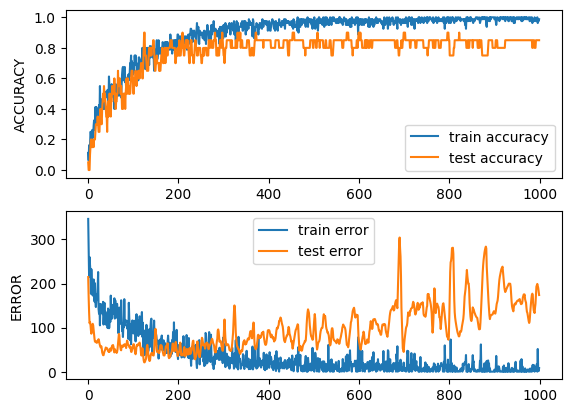

In [43]:
show_net(model.history)